<a href="https://colab.research.google.com/github/TonyTang222/Classifying-Housing-Affordability-in-London/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier




In [ ]:
from google.colab import files
files.upload()
data = pd.read_csv('London.csv')
data

Saving London.csv to London (1).csv


,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


In [ ]:
# describe
data.describe()

,Unnamed: 0,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,3480.000000,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1739.500000,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,1004.733796,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,0.000000,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,869.750000,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1739.500000,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2609.250000,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3479.000000,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


In [ ]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Property Name,0
Price,0
House Type,0
Area in sq ft,0
No. of Bedrooms,0
No. of Bathrooms,0
No. of Receptions,0
Location,962
City/County,0


In [ ]:
data['Location'].value_counts()

,count
Location,
Putney,96
Barnes,71
Wandsworth,70
Wimbledon,68
Esher,64
...,...
Aberdeen Park,1
Southgate Road,1
Dalston,1


In [ ]:
# drop postal codes, unnamed, location, property name

london_data_dropped = data.drop(columns=['Location', 'Property Name', 'Postal Code', 'Unnamed: 0','City/County'])

london_data_dropped.head()



,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
0,1675000,House,2716,5,5,5
1,650000,Flat / Apartment,814,2,2,2
2,735000,Flat / Apartment,761,2,2,2
3,1765000,House,1986,4,4,4
4,675000,Flat / Apartment,700,2,2,2


# EDA

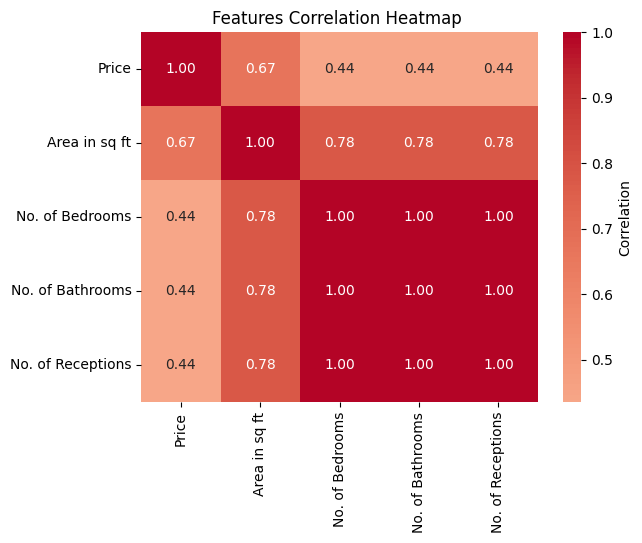

In [ ]:
# Compute correlation matrix using numeric data.
numeric_data = london_data_dropped.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Plotting heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation'})
plt.title('Features Correlation Heatmap ')
plt.show()

# The relation between number of bedrooms and the price


In [ ]:
# Group average price by number of bedrooms
avg_price_by_bedrooms = data.groupby('No. of Bedrooms')['Price'].mean()

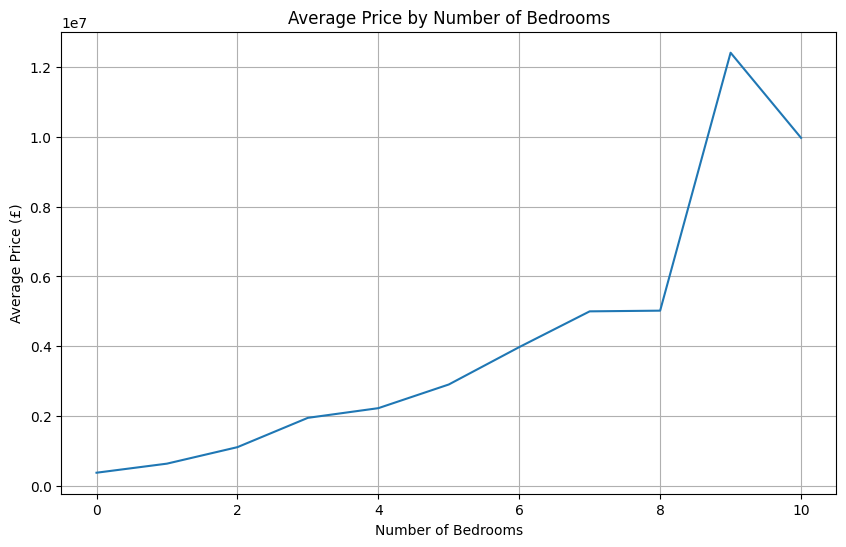

In [ ]:
# Visualize the trend of number of bedrooms and their average price
plt.figure(figsize=(10, 6))
avg_price_by_bedrooms.plot(kind='line')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (£)')
plt.grid(True)
plt.show()

In [ ]:
#Multiple bedrooms indicate luxury
'''
g = sns.displot(
    data=london_data_dropped,
    x='No. of Bedrooms',
    col='Affordability',
    row='City/County',
    kind='hist',
    fill=True
)

for ax in g.axes.flat:
    ax.set_yscale('log')

plt.show()
'''

"\ng = sns.displot(\n    data=london_data_dropped,\n    x='No. of Bedrooms',\n    col='Affordability',\n    row='City/County',\n    kind='hist',\n    fill=True\n)\n\nfor ax in g.axes.flat:\n    ax.set_yscale('log')\n\nplt.show()\n"

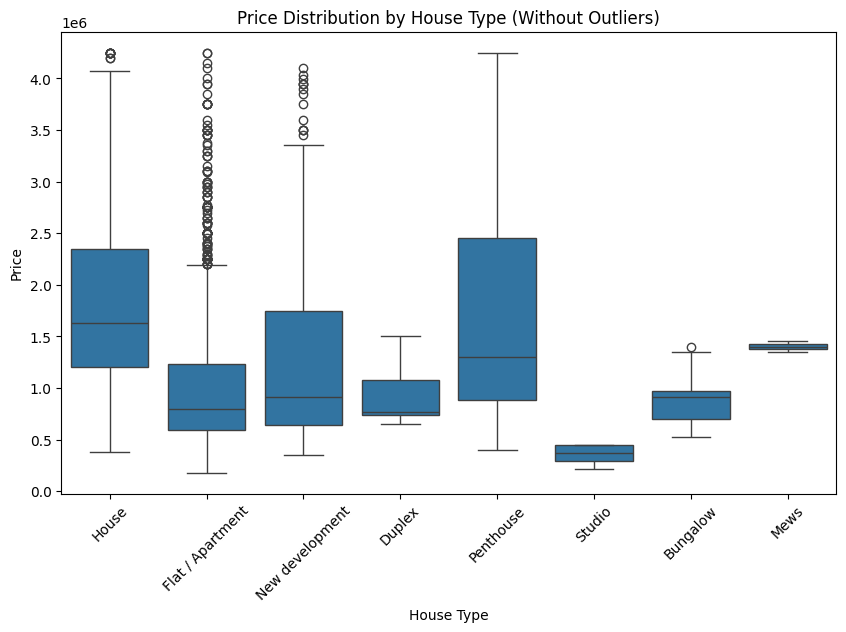

                  count      mean       std       min       25%       50%  \
House Type                                                                  
Bungalow              9   904,444   308,357   525,000   700,000   915,000   
Duplex                7   934,286   301,903   650,000   737,500   765,000   
Flat / Apartment  1,565 1,251,813 1,525,116   180,000   599,950   800,000   
House             1,430 2,388,378 2,297,805   375,000 1,225,000 1,750,000   
Mews                  2 1,400,000    70,711 1,350,000 1,375,000 1,400,000   
New development     357 2,186,312 3,519,847   350,000   650,000 1,050,000   
Penthouse           100 3,112,847 3,301,366   395,000   998,712 1,850,000   
Studio               10   357,500    88,702   210,000   295,000   367,500   

                       75%        max  
House Type                             
Bungalow           975,000  1,400,000  
Duplex           1,075,000  1,500,000  
Flat / Apartment 1,300,000 19,950,000  
House            2,737,500 34

In [ ]:
#How do prices vary by house type?

#remove outliers
q1 = london_data_dropped['Price'].quantile(0.25)
q3 = london_data_dropped['Price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_data = london_data_dropped[(london_data_dropped['Price'] >= lower_bound) &
                                    (london_data_dropped['Price'] <= upper_bound)]

# Visualize price distribution by House Type
plt.figure(figsize=(10, 6))
a = sns.boxplot(x='House Type', y='Price', data=filtered_data)
plt.title('Price Distribution by House Type (Without Outliers)')
plt.xlabel('House Type')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.show()

# Summary statistics by House Type
pd.options.display.float_format = '{:,.0f}'.format
print(data.groupby('House Type')['Price'].describe())

In [ ]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

flat_apartment_data = london_data_dropped[london_data_dropped['House Type'] == 1]  # Filter for 'Flat / Apartment'
sns.histplot(flat_apartment_data['Price'], kde=True)
plt.title('Distribution of Prices for Flat/Apartment')
plt.show()
'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nflat_apartment_data = london_data_dropped[london_data_dropped['House Type'] == 1]  # Filter for 'Flat / Apartment'\nsns.histplot(flat_apartment_data['Price'], kde=True)\nplt.title('Distribution of Prices for Flat/Apartment')\nplt.show()\n"

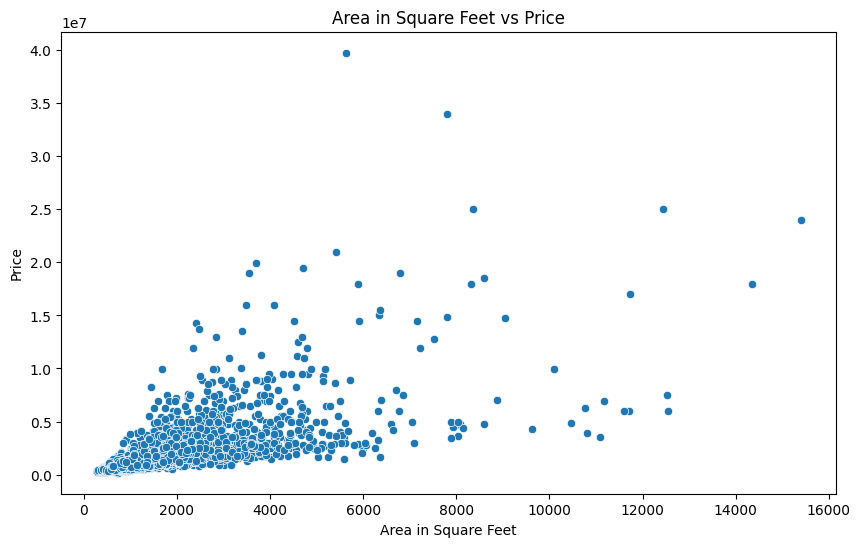

       Area in sq ft      Price
count          3,480      3,480
mean           1,713  1,864,173
std            1,364  2,267,283
min              274    180,000
25%              834    750,000
50%            1,310  1,220,000
75%            2,157  2,150,000
max           15,405 39,750,000


In [ ]:
# Scatter plot of Area in sq ft vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='Area in sq ft', y='Price', data=data)
plt.title('Area in Square Feet vs Price')
plt.xlabel('Area in Square Feet')
plt.ylabel('Price')
plt.show()

# Check for any outliers in the relationship
pd.options.display.float_format = '{:,.0f}'.format

print(data[['Area in sq ft', 'Price']].describe())

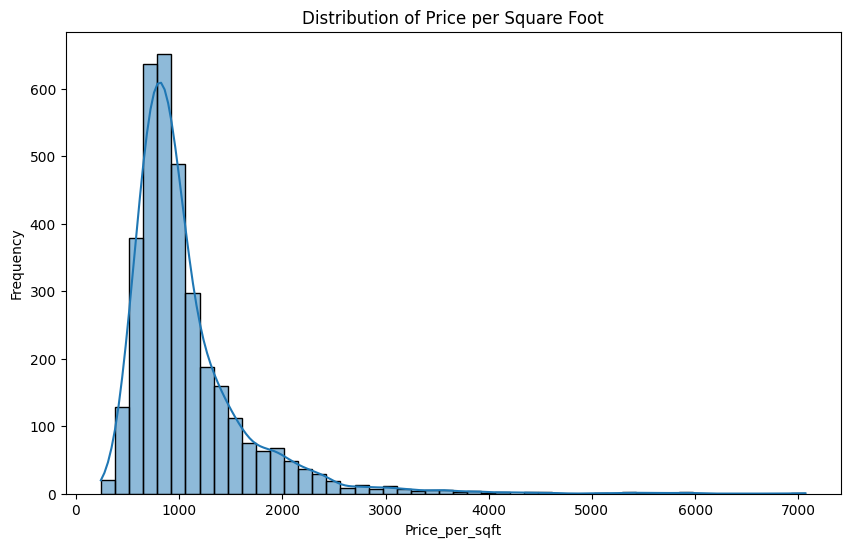

count   3,480
mean    1,066
std       578
min       242
25%       728
50%       905
75%     1,206
max     7,069
Name: Price_per_sqft, dtype: float64


In [ ]:
# Create a new column for Price per square foot
london_data_dropped['Price_per_sqft']=round(data['Price']/data['Area in sq ft'],2)

# Visualize the price per square foot distribution
plt.figure(figsize=(10,6))
sns.histplot(london_data_dropped['Price_per_sqft'], bins=50, kde=True)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price_per_sqft')
plt.ylabel('Frequency')
plt.show()

print(london_data_dropped['Price_per_sqft'].describe())

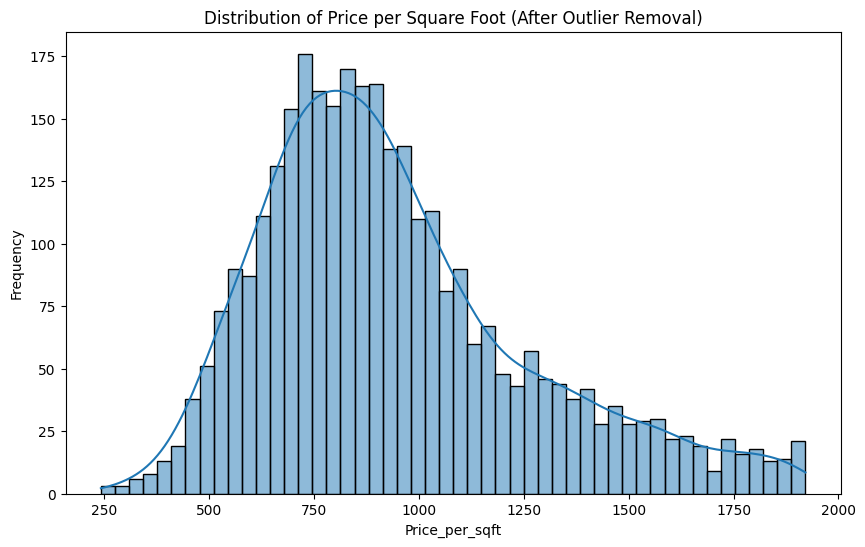

In [ ]:
# Calculate quantiles and IQR
Q1 = london_data_dropped['Price_per_sqft'].quantile(0.25)
Q3 = london_data_dropped['Price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data
filtered_data = london_data_dropped[(london_data_dropped['Price_per_sqft'] >= lower_bound)\
                                    & (london_data_dropped['Price_per_sqft'] <= upper_bound)]

# Visualize the price per square foot distribution for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Price_per_sqft'], bins=50, kde=True)
plt.title('Distribution of Price per Square Foot (After Outlier Removal)')
plt.xlabel('Price_per_sqft')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''threshold=data['Price_per_sqft'].median()
threshold
'''
threshold=675 #based on data from news

In [ ]:
london_data_dropped['Affordability'] = np.where(london_data_dropped['Price_per_sqft'] > threshold, 1, 0)  # 1 = Unaffordable, 0 = Affordable
london_data_dropped['Affordability'].value_counts()

,count
Affordability,
1,2863
0,617


In [ ]:
london_data_dropped['House Type'].value_counts()

,count
House Type,
Flat / Apartment,1565
House,1430
New development,357
Penthouse,100
Studio,10
Bungalow,9
Duplex,7
Mews,2


In [ ]:
'''london_data_dropped['House Type']=london_data_dropped['House Type'].replace(['Studio','Bungalow','Duplex','Mews'],'rare')'''

"london_data_dropped['House Type']=london_data_dropped['House Type'].replace(['Studio','Bungalow','Duplex','Mews'],'rare')"

In [ ]:
london_data_dropped['House Type'].unique()

array(['House', 'Flat / Apartment', 'New development', 'Duplex',
       'Penthouse', 'Studio', 'Bungalow', 'Mews'], dtype=object)

In [ ]:
'''london_data_dropped.groupby('House Type')['Affordability'].mean()'''

"london_data_dropped.groupby('House Type')['Affordability'].mean()"

In [ ]:
house_type_mapping={"House":1,"Flat / Apartment":2,"New development":3,"Penthouse":4,"Studio":5,"Bungalow":6,"Duplex":7,"Mews":8}
'''house_type_mapping={"House":1,"Flat / Apartment":2,"New development":3,"Penthouse":4,"rare":5}'''
london_data_dropped['House Type']=london_data_dropped['House Type'].map(house_type_mapping)
london_data_dropped['House Type'].unique()

array([1, 2, 3, 7, 4, 5, 6, 8])

In [ ]:
'''
# Calculate frequency of each city
freq = london_data_dropped['City/County'].value_counts()

# Map based on frequency
london_data_dropped['City/County'] = london_data_dropped['City/County'].map(lambda x: x if freq[x] > 12 else 'rare')

london_data_dropped['City/County'].unique()
'''


"\n# Calculate frequency of each city\nfreq = london_data_dropped['City/County'].value_counts()\n\n# Map based on frequency\nlondon_data_dropped['City/County'] = london_data_dropped['City/County'].map(lambda x: x if freq[x] > 12 else 'rare')\n\nlondon_data_dropped['City/County'].unique()\n"

In [ ]:
'''
city_county_mapping={"London":1,"Surrey":2,"Middlesex":3,"Essex":4,"rare":5}
london_data_dropped['City/County']=london_data_dropped['City/County'].map(city_county_mapping)
'''

'\ncity_county_mapping={"London":1,"Surrey":2,"Middlesex":3,"Essex":4,"rare":5}\nlondon_data_dropped[\'City/County\']=london_data_dropped[\'City/County\'].map(city_county_mapping)\n'

In [ ]:
'''
london_data_dropped['City/County'].unique()
'''

"\nlondon_data_dropped['City/County'].unique()\n"

In [ ]:
'''
from sklearn.cluster import KMeans

features = ['Price_per_sqft', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms','House Type', 'No. of Receptions']
kmeans = KMeans(n_clusters=2, random_state=42)
london_data_dropped['Affordability'] = kmeans.fit_predict(london_data_dropped[features])

label_map = {0: 'Affordable', 1: 'Unaffordable'}
london_data_dropped['Affordability'] = london_data_dropped['Affordability'].map(label_map)
london_data_dropped['Affordability'].value_counts()
'''

"\nfrom sklearn.cluster import KMeans\n\nfeatures = ['Price_per_sqft', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms','House Type', 'No. of Receptions']\nkmeans = KMeans(n_clusters=2, random_state=42)\nlondon_data_dropped['Affordability'] = kmeans.fit_predict(london_data_dropped[features])\n\nlabel_map = {0: 'Affordable', 1: 'Unaffordable'}\nlondon_data_dropped['Affordability'] = london_data_dropped['Affordability'].map(label_map)\nlondon_data_dropped['Affordability'].value_counts()\n"

In [ ]:
london_data_dropped
london_data_dropped['Affordability'].value_counts()

,count
Affordability,
1,2863
0,617


In [ ]:
# data cleaning
# make the data numeric
'''
london_data_cleaned = london_data_dropped

house_type_mapping = {"House": 1, "Flat / Apartment": 2}  # Adjust based on your unique values

city_county_mapping = {city: idx + 1 for idx, city in enumerate(london_data_cleaned['City/County'].unique())}

for dataset in [london_data_cleaned]:
    dataset['House Type Encoded'] = dataset['House Type'].map(house_type_mapping)
    dataset['City/County Encoded'] = dataset['City/County'].map(city_county_mapping)

# Fill any missing values (if applicable) with 0
london_data_cleaned['House Type Encoded'] = london_data_cleaned['House Type Encoded'].fillna(0)
london_data_cleaned['City/County Encoded'] = london_data_cleaned['City/County Encoded'].fillna(0)

print(london_data_cleaned[['House Type', 'House Type Encoded', 'City/County', 'City/County Encoded']].head())
'''






'\nlondon_data_cleaned = london_data_dropped\n\nhouse_type_mapping = {"House": 1, "Flat / Apartment": 2}  # Adjust based on your unique values\n\ncity_county_mapping = {city: idx + 1 for idx, city in enumerate(london_data_cleaned[\'City/County\'].unique())}\n\nfor dataset in [london_data_cleaned]:\n    dataset[\'House Type Encoded\'] = dataset[\'House Type\'].map(house_type_mapping)\n    dataset[\'City/County Encoded\'] = dataset[\'City/County\'].map(city_county_mapping)\n\n# Fill any missing values (if applicable) with 0\nlondon_data_cleaned[\'House Type Encoded\'] = london_data_cleaned[\'House Type Encoded\'].fillna(0)\nlondon_data_cleaned[\'City/County Encoded\'] = london_data_cleaned[\'City/County Encoded\'].fillna(0)\n\nprint(london_data_cleaned[[\'House Type\', \'House Type Encoded\', \'City/County\', \'City/County Encoded\']].head())\n'

In [ ]:
# Create mappings for House Type and City/County
'''
house_type_mapping = {"House": 1, "Flat / Apartment": 2}  # Adjust based on your dataset
city_county_mapping = {city: idx + 1 for idx, city in enumerate(london_data_cleaned['City/County'].unique())}

london_data_cleaned['House Type Encoded'] = london_data_cleaned['House Type'].map(house_type_mapping)
london_data_cleaned['City/County Encoded'] = london_data_cleaned['City/County'].map(city_county_mapping)

london_data_cleaned['House Type Encoded'] = london_data_cleaned['House Type Encoded'].fillna(0)
london_data_cleaned['City/County Encoded'] = london_data_cleaned['City/County Encoded'].fillna(0)

london_data_cleaned.head()
'''

'\nhouse_type_mapping = {"House": 1, "Flat / Apartment": 2}  # Adjust based on your dataset\ncity_county_mapping = {city: idx + 1 for idx, city in enumerate(london_data_cleaned[\'City/County\'].unique())}\n\nlondon_data_cleaned[\'House Type Encoded\'] = london_data_cleaned[\'House Type\'].map(house_type_mapping)\nlondon_data_cleaned[\'City/County Encoded\'] = london_data_cleaned[\'City/County\'].map(city_county_mapping)\n\nlondon_data_cleaned[\'House Type Encoded\'] = london_data_cleaned[\'House Type Encoded\'].fillna(0)\nlondon_data_cleaned[\'City/County Encoded\'] = london_data_cleaned[\'City/County Encoded\'].fillna(0)\n\nlondon_data_cleaned.head()\n'

In [ ]:
# Drop all non-numeric columns
'''
numeric_data = london_data_cleaned.select_dtypes(include=['number'])

# Display the first few rows of the numeric-only dataset
numeric_data.head()

#house type 1.0 = House, 2.0= flat
#city 1.0 = london
'''

"\nnumeric_data = london_data_cleaned.select_dtypes(include=['number'])\n\n# Display the first few rows of the numeric-only dataset\nnumeric_data.head()\n\n#house type 1.0 = House, 2.0= flat\n#city 1.0 = london\n"

In [ ]:
'''data.groupby('No. of Bedrooms')['Affordability'].mean()'''

"data.groupby('No. of Bedrooms')['Affordability'].mean()"

In [ ]:
'''
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
'''

'\nlogreg = LogisticRegression()\nlogreg.fit(X_train, y_train)\ny_pred = logreg.predict(X_test)\nprint(classification_report(y_test, y_pred))\n'

In [ ]:
X = london_data_dropped.drop(columns=['Affordability'])  # Features used for prediction
y = london_data_dropped['Affordability']  # Target labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

94.94

In [ ]:
#tuning model

gaussian = GaussianNB(var_smoothing=1e-10)
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

96.84

In [ ]:
#Random Forest Classifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc_classifier = round(classifier.score(X_train, y_train) * 100, 2)
acc_classifier

100.0

In [ ]:
# Logistic Regression

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_test=lr.predict(X_test)
lr_score=round(lr.score(X_train,y_train)*100,2)
lr_score

100.0

In [ ]:
'''
# Scale the features
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
'''

'\n# Scale the features\nscaler = StandardScaler()\n\n# Fit and transform the training data\nX_train_scaled = scaler.fit_transform(X_train)\n\n# Transform the test data\nX_test_scaled = scaler.transform(X_test)\n\n# Initialize the logistic regression model\nlogreg = LogisticRegression(random_state=42)\n\n# Train the model\nlogreg.fit(X_train_scaled, y_train)\ny_pred = logreg.predict(X_test_scaled)\n'